### ⚙️ **1. What is Time Series Decomposition?**

Time series decomposition is the process of breaking down a time series into **3 main components**:

* **Trend-Cycle ($T_t$)**: The long-term progression of the series (e.g., employment gradually increasing over years).
* **Seasonal ($S_t$)**: Repeating short-term patterns (e.g., holiday hiring spikes every December).
* **Remainder/Residual ($R_t$)**: The noise or irregular fluctuations not explained by trend or seasonality.

---

### ➕ **2. Additive vs. Multiplicative Decomposition**

#### 🟧 **Additive Decomposition**

$$
y_t = S_t + T_t + R_t
$$

* Seasonal and irregular components are **constant in magnitude** (do not grow/shrink as the overall level of the series changes).
* Use when the seasonal effect is **independent** of the overall level.

#### ✖️ **Multiplicative Decomposition**

$$
y_t = S_t \times T_t \times R_t
$$

* Seasonal and irregular components are **proportional** to the trend.
* Common in **economic data** where seasonal effects grow with the trend.

---

### 🔁 **3. When to Use Log Transformation?**

If you want to use an additive model on a series where the multiplicative model is more appropriate, you can **log-transform the data**.
Why? Because:

$$
\log(y_t) = \log(S_t) + \log(T_t) + \log(R_t)
$$

This converts the **multiplicative** model into an **additive** one.

---

### 📊 **4. Example: US Retail Employment**

* The example uses monthly U.S. retail employment data from 1990 onward.
* They use the **STL method** (Seasonal-Trend decomposition using Loess) to decompose the series into its components.



### ✅ 1. Simulate a Time Series Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Set seed for reproducibility
np.random.seed(42)

# Create monthly date range
date_range = pd.date_range(start='2010-01-01', periods=120, freq='M')  # 10 years

# Create components
trend = np.linspace(100, 200, 120)                         # gradually increasing trend
seasonality = 10 * np.sin(2 * np.pi * date_range.month / 12)  # yearly seasonality
noise = np.random.normal(0, 3, 120)                        # random noise

# Combine them into an additive series
employed = trend + seasonality + noise

# Build DataFrame
df = pd.DataFrame({
    'Month': date_range,
    'Employed': employed
})
df.set_index('Month', inplace=True)

# Preview
df.head()


/tmp/ipykernel_75732/2804562724.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2010-01-01', periods=120, freq='M')  # 10 years


,Employed
Month,
2010-01-31,106.490142
2010-02-28,109.085797
2010-03-31,113.623738
2010-04-30,115.750352
2010-05-31,107.658884


### ✅ 2. Plot Simulated Data


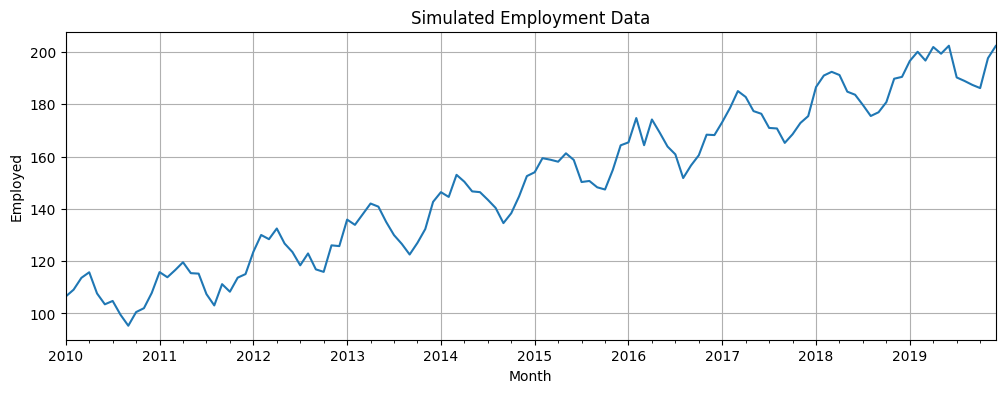

In [3]:
# plotting simulated data

df['Employed'].plot(figsize=(12, 4), title='Simulated Employment Data', ylabel='Employed')
plt.grid(True)
plt.show()


### ✅ 3. Apply STL Decomposition

In [4]:
stl = STL(df['Employed'], period=12)  # monthly data
res = stl.fit()

# Create component DataFrame
components = pd.DataFrame({
    'Employed': df['Employed'],
    'Trend': res.trend,
    'Seasonal': res.seasonal,
    'Remainder': res.resid
}, index=df.index)


### ✅ 4. Plot All Components Together


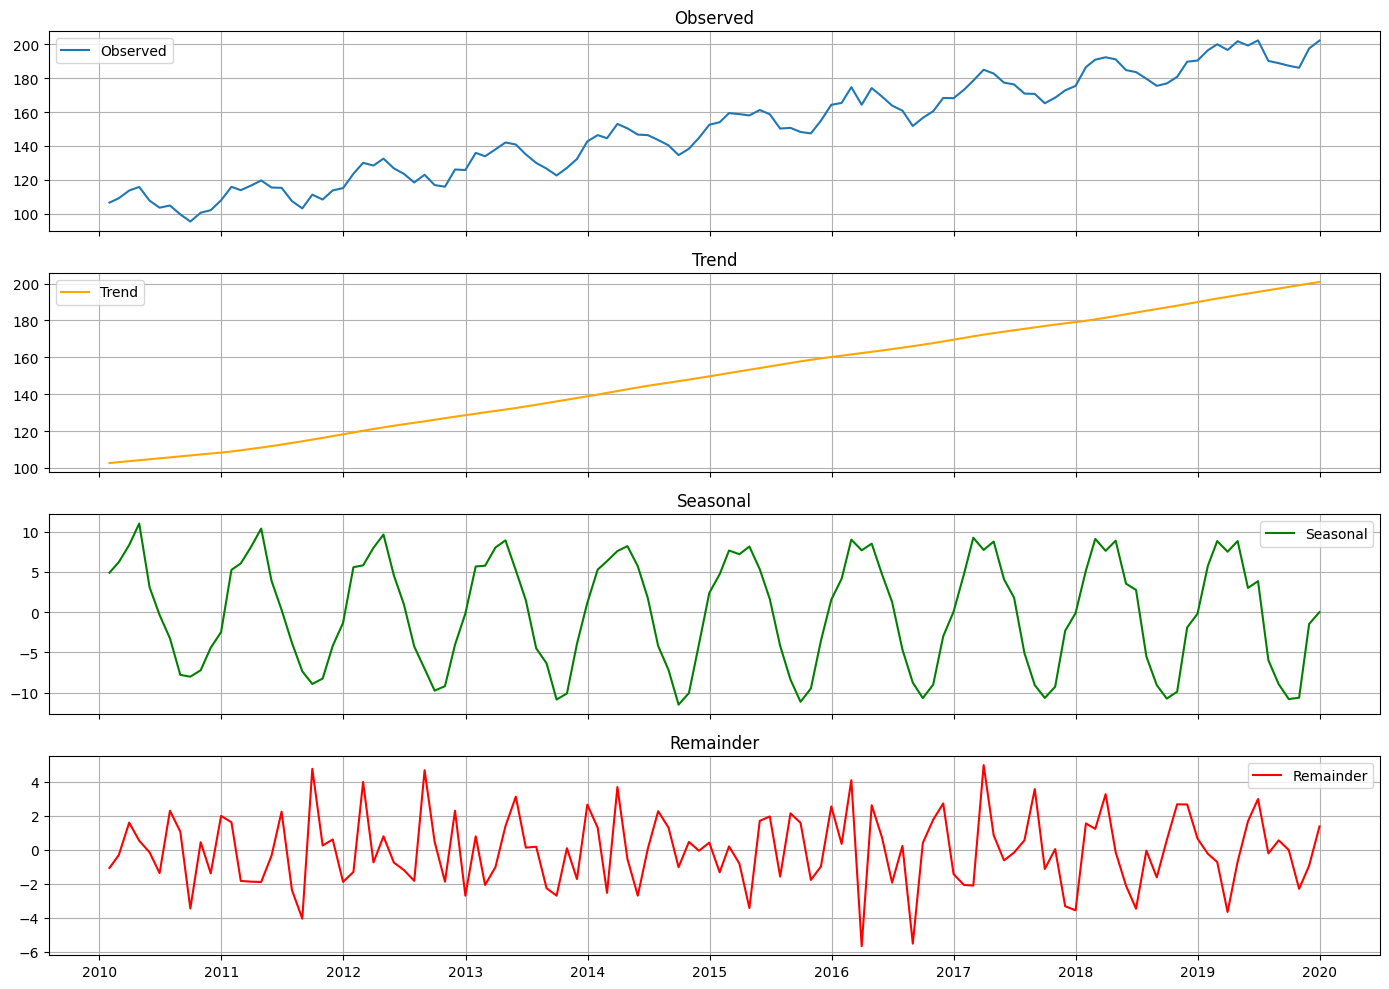

In [5]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(components.index, components['Employed'], label='Observed')
axs[0].set_title('Observed')
axs[1].plot(components.index, components['Trend'], color='orange', label='Trend')
axs[1].set_title('Trend')
axs[2].plot(components.index, components['Seasonal'], color='green', label='Seasonal')
axs[2].set_title('Seasonal')
axs[3].plot(components.index, components['Remainder'], color='red', label='Remainder')
axs[3].set_title('Remainder')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


### 📊 Interpretation of the Components

| Component     | What it shows                                                         |
| ------------- | --------------------------------------------------------------------- |
| **Observed**  | The actual data we generated.                                         |
| **Trend**     | The long-term increase in the number of employed people.              |
| **Seasonal**  | Recurring ups and downs within a year.                                |
| **Remainder** | What’s left (randomness or noise) after removing trend + seasonality. |

---

### 🔄 Additive vs Multiplicative Decomposition

#### Example with Log Transformation:

Suppose you have multiplicative data:

$$
y_t = T_t \times S_t \times R_t
$$

You can **log-transform** it:

$$
\log(y_t) = \log(T_t) + \log(S_t) + \log(R_t)
$$

Now you can apply **additive decomposition** on the log-transformed data.

---

## ✅ Summary

* Use `STL` to extract **trend**, **seasonal**, and **remainder** from a time series.
* Additive decomposition is good when seasonality is stable in size.
* Multiplicative decomposition is used when fluctuations grow/shrink with the trend.
* You can always log-transform multiplicative time series to make them additive.